In [1]:
import baspy as bp

# baspy is a tool used at BAS for keeping track of the CMIP6 data

In [2]:
ls /gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/

BCC-CSM2-MR/  CMCC-ESM2/  HadGEM3-GC31-LL/


In [23]:
from pathlib import Path
import xarray as xr
import baspy as bp
import numpy as np

utci_path = Path(
    "/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg_monthly/"
)
scratch_path = Path("/work/scratch-pw/champs/hackathon/gsat")

file_nested_list = []
model_list = []
scenario_list = []
runid_list = []


for model_path in utci_path.glob("*"):
    model = str(model_path).split("/")[-1]
    model_list.append(model)
    file_nested_list.append([])
    for scenario_path in model_path.glob("*"):
        scenario = str(scenario_path).split("/")[-1]
        scenario_list.append(scenario)
        file_nested_list[-1].append([])
        for runid_path in scenario_path.glob("*"):
            runid = str(runid_path).split("/")[-1]
            runid_list.append(runid)

            print(model, scenario, runid)
            files = list(runid_path.glob("*"))
            file_nested_list[-1][-1].append(files)

            catlg_tas = bp.catalogue(
                dataset="cmip6",
                Experiment=scenario,
                CMOR="Amon",
                Var="tas",
                Model=model,
                RunID=runid,
            )

            ds_tas = xr.open_mfdataset(bp.get_files(catlg_tas), combine="by_coords")
            da_area = np.cos(np.deg2rad(ds_tas.lat))

            gsat = ds_tas.tas.weighted(da_area).mean(["lat", "lon"]).resample(time='Y').mean().to_dataset(name='gsat')
            gsat.gsat.attrs = {'long_name': 'Global-mean near-surface air temperature', 'units': 'K', 'short_name': 'GSAT'}

            output_path = scratch_path / model / scenario / runid / "gsat.nc"
            output_path.parent.mkdir(parents=True, exist_ok=True)
            gsat.to_netcdf(output_path)

        break
#     break

HadGEM3-GC31-LL historical r1i1p1f3
BCC-CSM2-MR historical r1i1p1f1
CMCC-ESM2 historical r1i1p1f1


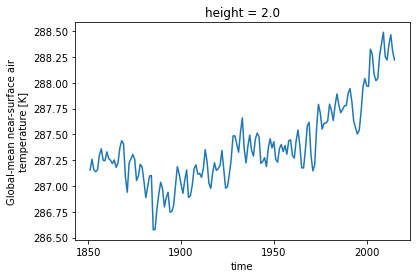

In [22]:
gmst.gsat.plot()

In [6]:
import regionmask

In [11]:
regionmask.defined_regions.srex.mask(ds_tas.lat, ds_tas.lon)

<xarray.DataArray 'region' (lat: 192, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  6., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lon      (lon) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38